#1. Mount Drive

from google.colab import drive
drive.mount('/gdrive')

!ls -al '/gdrive/My Drive/data'

#2. Korean Characters

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 전역 폰트 설정
plt.rc('font', family='NanumGothic') 

#3. Load Data

In [3]:
import pandas as pd

In [4]:
# Load a file under "data" folder
# file = "/gdrive/My Drive/data/data_2020.csv"
file = "data/data_2020.csv"
data = pd.read_csv(file)

In [5]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


#4. 집계시

In [7]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [8]:
# Create data_06_22 Dataframe with counting by 집계시
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
82028,20200715,6,101,140,16775,2
125225,20201026,6,101,110,5101,0
66049,20200609,6,101,105,713,1
66048,20200609,6,101,105,816,1
76951,20200704,6,101,135,10050,5
...,...,...,...,...,...,...
74174,20200628,22,101,105,765,6
74175,20200628,22,101,105,870,6
74176,20200628,22,101,105,849,6
107489,20200915,22,101,115,6371,1


In [9]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [10]:
data_06_22_counting

13    7092
14    7091
12    7089
15    7078
11    7059
10    7038
16    7011
9     7008
17    6919
8     6849
18    6742
19    6627
7     6614
20    6518
21    6284
22    6130
6     6095
Name: 집계시, dtype: int64

In [11]:
data_06_22_counting_sorted = data_06_22_counting.sort_index()

In [12]:
data_06_22_counting_sorted

6     6095
7     6614
8     6849
9     7008
10    7038
11    7059
12    7089
13    7092
14    7091
15    7078
16    7011
17    6919
18    6742
19    6627
20    6518
21    6284
22    6130
Name: 집계시, dtype: int64

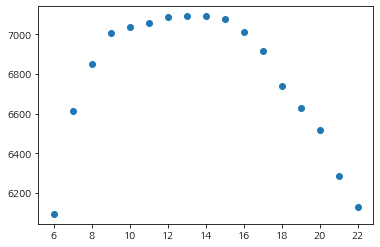

In [13]:
plt.scatter(data_06_22_counting_sorted.index, data_06_22_counting_sorted.values)

In [14]:
data_06_22

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
10,20200101,10,101,105,686,2
11,20200101,10,101,105,761,2
12,20200101,10,101,105,704,2
13,20200101,10,101,105,807,2
14,20200101,10,101,105,687,2
...,...,...,...,...,...,...
152861,20201231,20,101,140,17001,3
152862,20201231,6,101,115,4652,3
152864,20201231,19,101,140,16355,3
152867,20201231,6,101,110,3173,3


In [15]:
data_06_22_time = data_06_22['통행시간']

In [16]:
data_06_22_time

10          686
11          761
12          704
13          807
14          687
          ...  
152861    17001
152862     4652
152864    16355
152867     3173
152868     3866
Name: 통행시간, Length: 115244, dtype: int64

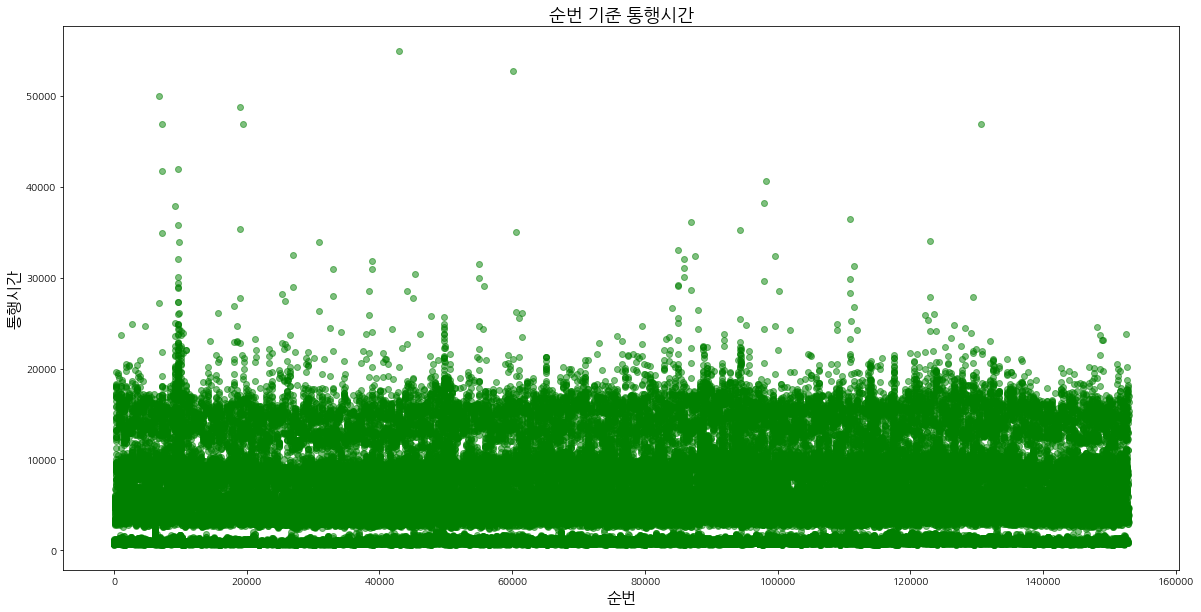

In [17]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae scatter Chart
plt.scatter(data_06_22_time.index, data_06_22_time.values, c="g", alpha=0.5)
# Generate labels and title
plt.title("순번 기준 통행시간",fontsize=18)
plt.xlabel('순번', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()

In [18]:
data_days = data.groupby(by=['집계일자']).mean()

In [19]:
data_days

,집계시,출발영업소코드,도착영업소코드,통행시간,요일
집계일자,,,,,
20200101,12.070707,101.0,114.785354,5241.186869,2.0
20200102,12.179245,101.0,113.985849,4776.393868,3.0
20200103,11.780702,101.0,115.230263,5351.916667,4.0
20200104,11.694030,101.0,114.838308,5206.171642,5.0
20200105,12.508333,101.0,115.263889,5266.744444,6.0
...,...,...,...,...,...
20201227,12.262032,101.0,114.852941,4663.919786,6.0
20201228,11.721854,101.0,114.823400,5231.538631,0.0
20201229,11.644295,101.0,113.903803,4961.552573,1.0


In [20]:
data_days_time = data_days['통행시간']

In [21]:
data_days_time

집계일자
20200101    5241.186869
20200102    4776.393868
20200103    5351.916667
20200104    5206.171642
20200105    5266.744444
               ...     
20201227    4663.919786
20201228    5231.538631
20201229    4961.552573
20201230    4749.453682
20201231    5426.261851
Name: 통행시간, Length: 365, dtype: float64

In [22]:
# Store index of data_06_22_counting into x
x = data_days_time.index

In [23]:
labels = [str(i) for i in x]

In [24]:
labels

['20200101',
 '20200102',
 '20200103',
 '20200104',
 '20200105',
 '20200106',
 '20200107',
 '20200108',
 '20200109',
 '20200110',
 '20200111',
 '20200112',
 '20200113',
 '20200114',
 '20200115',
 '20200116',
 '20200117',
 '20200118',
 '20200119',
 '20200120',
 '20200121',
 '20200122',
 '20200123',
 '20200124',
 '20200125',
 '20200126',
 '20200127',
 '20200128',
 '20200129',
 '20200130',
 '20200131',
 '20200201',
 '20200202',
 '20200203',
 '20200204',
 '20200205',
 '20200206',
 '20200207',
 '20200208',
 '20200209',
 '20200210',
 '20200211',
 '20200212',
 '20200213',
 '20200214',
 '20200215',
 '20200216',
 '20200217',
 '20200218',
 '20200219',
 '20200220',
 '20200221',
 '20200222',
 '20200223',
 '20200224',
 '20200225',
 '20200226',
 '20200227',
 '20200228',
 '20200229',
 '20200301',
 '20200302',
 '20200303',
 '20200304',
 '20200305',
 '20200306',
 '20200307',
 '20200308',
 '20200309',
 '20200310',
 '20200311',
 '20200312',
 '20200313',
 '20200314',
 '20200315',
 '20200316',
 '20200317',

In [25]:
# Store values of data_days_time into values
values = data_days_time.values

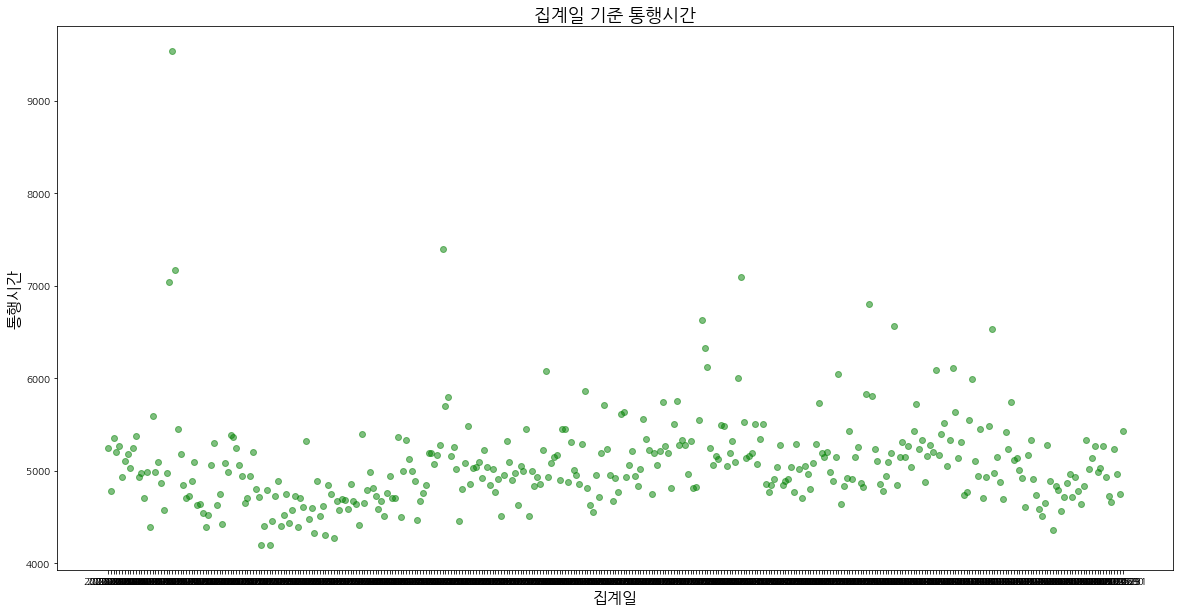

In [26]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae pie Chart
plt.scatter(labels, values, c="g", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('집계일', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()

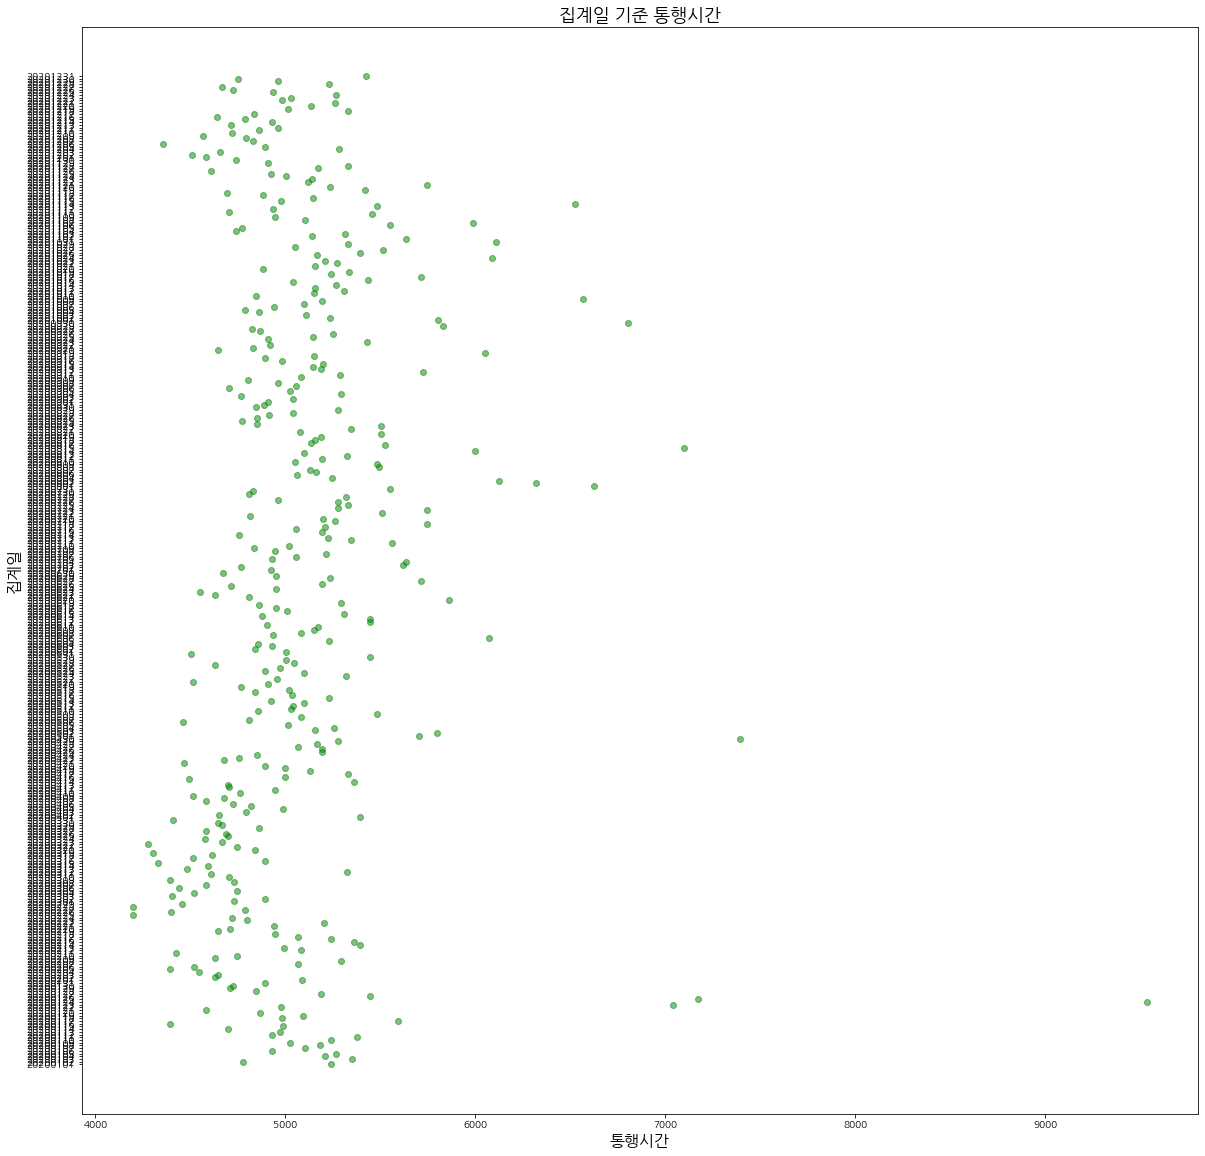

In [27]:
# Configure figure size
plt.figure(figsize=(20,20))
# Creae pie Chart
plt.scatter(values, labels, c="g", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('통행시간', fontdict= {'size':16})
plt.ylabel('집계일', fontdict= {'size':16})
# Show plot
plt.show()

In [28]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
data_110_days = data[data['도착영업소코드'] == 110].groupby(by=['집계일자']).mean()
data_125_days = data[data['도착영업소코드'] == 125].groupby(by=['집계일자']).mean()
data_140_days = data[data['도착영업소코드'] == 140].groupby(by=['집계일자']).mean()

In [29]:
data_110_days_time = data_110_days['통행시간']
data_125_days_time = data_125_days['통행시간']
data_140_days_time = data_140_days['통행시간']

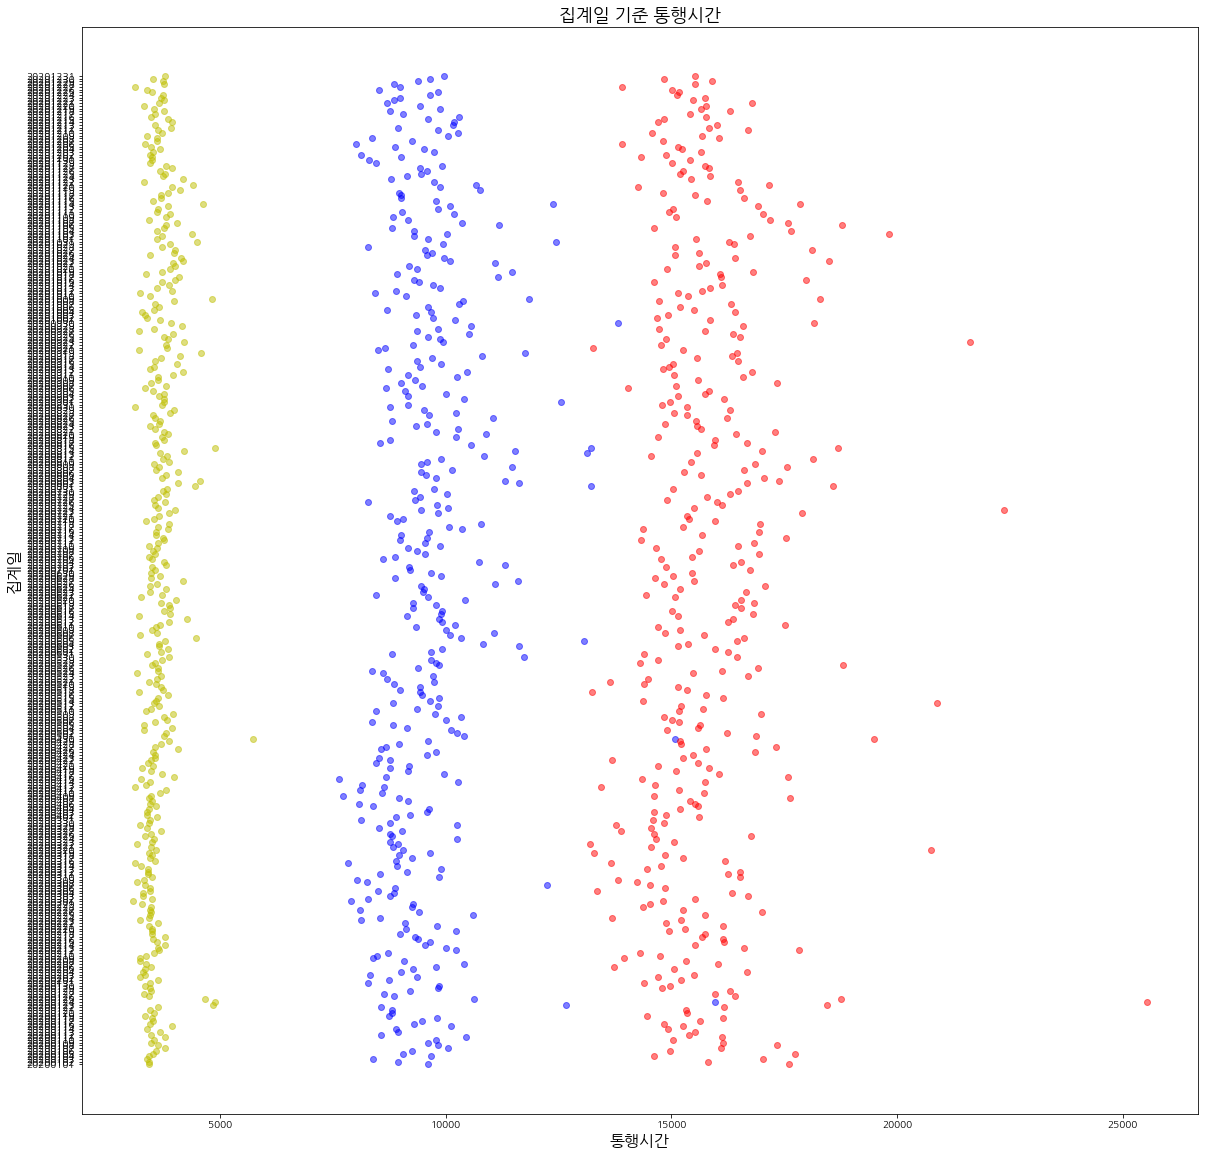

In [31]:
# Configure figure size
plt.figure(figsize=(20,20))
# Creae pie Chart
plt.scatter(data_110_days_time.values, labels, c="y", alpha=0.5)
plt.scatter(data_125_days_time.values, labels, c="b", alpha=0.5)
plt.scatter(data_140_days_time.values, labels, c="r", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('통행시간', fontdict= {'size':16})
plt.ylabel('집계일', fontdict= {'size':16})
# Show plot
plt.show()